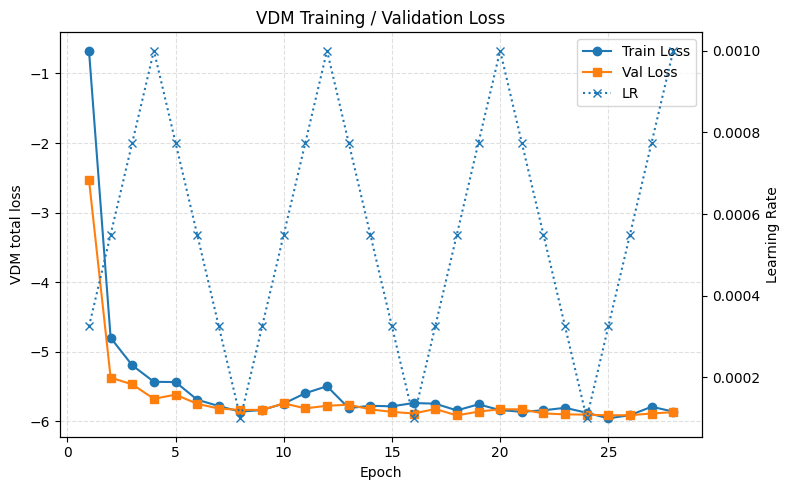

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === 여기만 네 로그 파일 경로로 바꾸면 됨 ===
LOG_CSV_PATH = "/home/mingyeong/GAL2DM_ASIM_VDM/results/vdm/71897/icase-both-keep2_vdm_tgt-rho_bs1_clr[1e-04-1e-03]_s42_smp10_log.csv"
# 예: "results/vdm/20251211_123456/icase-both-keep2_vdm_tgt-rho_bs1_..._log.csv"
# =========================================

# 주피터에서 그림 보이게
%matplotlib inline

if not os.path.exists(LOG_CSV_PATH):
    raise FileNotFoundError(f"Log CSV not found: {LOG_CSV_PATH}")

df = pd.read_csv(LOG_CSV_PATH)

required_cols = {"epoch", "train_loss", "val_loss"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"CSV must contain columns: {required_cols}, but has {df.columns.tolist()}")

epochs = df["epoch"].values
train_loss = df["train_loss"].values
val_loss   = df["val_loss"].values
lr         = df["lr"].values if "lr" in df.columns else None

fig, ax1 = plt.subplots(figsize=(8, 5))

# Loss curves
ax1.plot(epochs, train_loss, marker="o", label="Train Loss")
ax1.plot(epochs, val_loss, marker="s", label="Val Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("VDM total loss")
ax1.set_title("VDM Training / Validation Loss")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(loc="best")

# (선택) 오른쪽 축에 learning rate 같이 보기
if lr is not None:
    ax2 = ax1.twinx()
    ax2.plot(epochs, lr, linestyle=":", marker="x", label="LR")
    ax2.set_ylabel("Learning Rate")
    
    # 두 축 legend 합치기
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

fig.tight_layout()
plt.show()


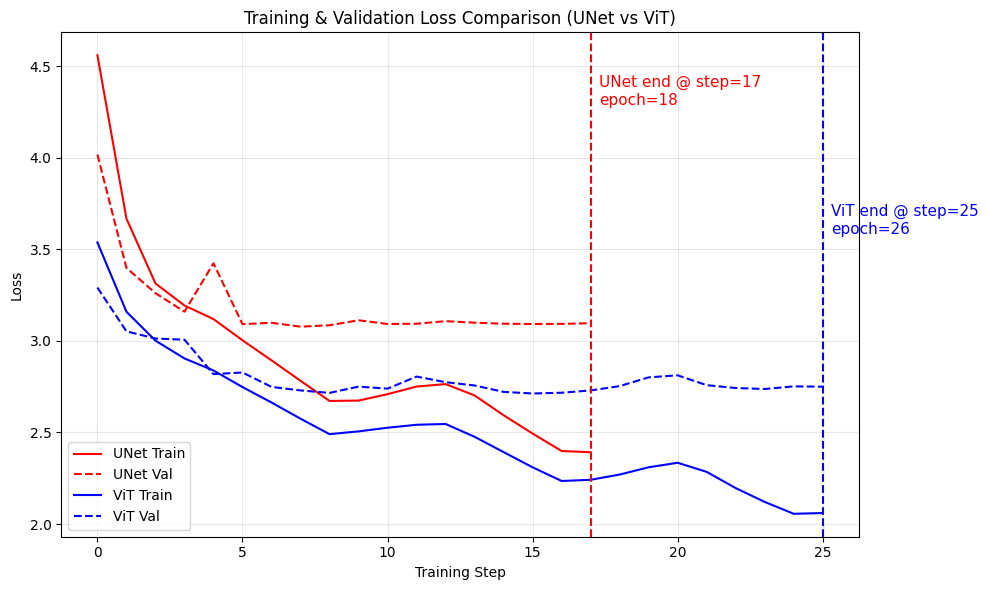

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load logs
# --------------------------
unet_log_path = "/home/mingyeong/GAL2DM_ASIM_VNET/results/vnet/icase-both/28845/icase-both-keep2_unet3d_tgt-rho_bs4_clr[1e-04-1e-03]_s42_smp100_log.csv"
vit_log_path  = "/home/mingyeong/GAL2DM_ASIM_ViT/results/vit/28846/icase-both_vitunet3d_tgt-rho_D128_ps8x8_st8x8_dim256_depth3_heads8_bs4_clr[1e-04-1e-03]_s42_smp100_log.csv"

df_unet = pd.read_csv(unet_log_path)
df_vit  = pd.read_csv(vit_log_path)

# --------------------------
# Normalize column names
# --------------------------
rename_map = {
    'train_loss': 'loss',
    'step_loss': 'loss',
    'valid_loss': 'val_loss',
    'validation_loss': 'val_loss',
    'lr': 'learning_rate',
    'epoch': 'epoch',
    'Epoch': 'epoch'
}
df_unet = df_unet.rename(columns=rename_map)
df_vit  = df_vit.rename(columns=rename_map)

# Fill missing val_loss if needed
if 'val_loss' not in df_unet: df_unet['val_loss'] = None
if 'val_loss' not in df_vit:  df_vit['val_loss']  = None

# --------------------------
# Determine end steps and epochs
# --------------------------
end_step_unet = len(df_unet) - 1
end_step_vit  = len(df_vit) - 1

epoch_unet = int(df_unet['epoch'].iloc[-1]) if 'epoch' in df_unet.columns else '-'
epoch_vit  = int(df_vit['epoch'].iloc[-1]) if 'epoch' in df_vit.columns else '-'

# --------------------------
# Plot
# --------------------------
plt.figure(figsize=(10,6))

# UNet (red)
plt.plot(df_unet['loss'],     color="red",   linestyle="-",  label="UNet Train")
plt.plot(df_unet['val_loss'], color="red",   linestyle="--", label="UNet Val")

# ViT (blue)
plt.plot(df_vit['loss'],      color="blue",  linestyle="-",  label="ViT Train")
plt.plot(df_vit['val_loss'],  color="blue",  linestyle="--", label="ViT Val")

# --------------------------
# Vertical lines for both final steps
# --------------------------
plt.axvline(end_step_unet, color="red", linestyle="--", linewidth=1.5)
plt.axvline(end_step_vit,  color="blue", linestyle="--", linewidth=1.5)

# Text annotations next to each vertical line
ylim_top = plt.ylim()[1]

plt.text(end_step_unet + 0.3, ylim_top*0.95,
         f"UNet end @ step={end_step_unet}\nepoch={epoch_unet}",
         color="red", fontsize=11, va='top')

plt.text(end_step_vit + 0.3, ylim_top*0.80,
         f"ViT end @ step={end_step_vit}\nepoch={epoch_vit}",
         color="blue", fontsize=11, va='top')

# --------------------------
# Formatting
# --------------------------
plt.title("Training & Validation Loss Comparison (UNet vs ViT)")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



epochs: [1. 2. 3. 4. 5.] ... -> 43.0


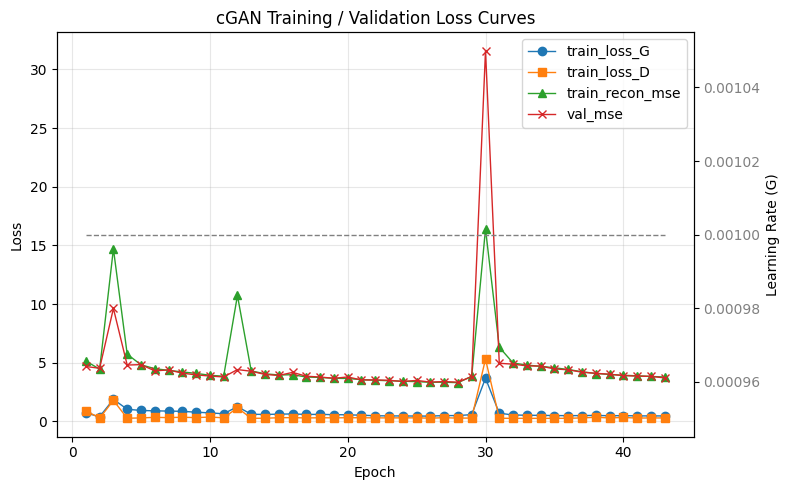

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 파일 경로 ----
csv_path = (
    "/home/mingyeong/GAL2DM_ASIM_GAN/results/cgan/35239/"
    "icase-both-keep2_cgan_tgt-rho_bs4_clr[1e-03-1e-03]_s42_smp10_log.csv"
)

# ---- CSV 로드 ----
# 첫 줄은 헤더라서 skip_header=1
data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# 열 분리 (스크린샷 기준)
epoch         = data[:, 0]
train_loss_G  = data[:, 1]
train_loss_D  = data[:, 2]
train_recon_mse = data[:, 3]
val_mse       = data[:, 4]
lr_G          = data[:, 5]

print("epochs:", epoch[:5], "... ->", epoch[-1])

# ---- Loss curve 시각화 ----
fig, ax1 = plt.subplots(figsize=(8, 5))

# 왼쪽 y축: loss 들
ax1.plot(epoch, train_loss_G,  label="train_loss_G",  marker="o", linestyle="-", linewidth=1)
ax1.plot(epoch, train_loss_D,  label="train_loss_D",  marker="s", linestyle="-", linewidth=1)
ax1.plot(epoch, train_recon_mse, label="train_recon_mse", marker="^", linestyle="-", linewidth=1)
ax1.plot(epoch, val_mse,       label="val_mse",       marker="x", linestyle="-", linewidth=1)

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("cGAN Training / Validation Loss Curves")
ax1.grid(True, alpha=0.3)
ax1.legend(loc="upper right")

# 오른쪽 y축: learning rate (옵션)
ax2 = ax1.twinx()
ax2.plot(epoch, lr_G, color="gray", linestyle="--", linewidth=1, label="lr_G")
ax2.set_ylabel("Learning Rate (G)")
ax2.tick_params(axis="y", labelcolor="gray")

# lr 범위가 너무 작으면 로그 스케일도 시도해볼 수 있음
# ax2.set_yscale("log")

fig.tight_layout()
plt.show()
